In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./data/IPO정리.xlsx")

In [3]:
#날짜형 데이터 변환
date_cols = [
    "수요예측 시작일","수요예측 종료일",
    "청약 시작일","청약 종료일",
    "상장예정일"
]

for c in date_cols:
    df[c] = pd.to_datetime(df[c])

#전체 날짜 범위 생성
date_range = pd.date_range(
df["수요예측 시작일"].min(),
df["상장예정일"].max()
)

heat = pd.DataFrame({"날짜": date_range})

#날짜 포함 여부 계산
heat["수요예측개수"] = heat["날짜"].apply(
    lambda d: ((df["수요예측 시작일"] <= d) &
               (df["수요예측 종료일"] >= d)).sum()
)

heat["청약개수"] = heat["날짜"].apply(
    lambda d: ((df["청약 시작일"] <= d) &
               (df["청약 종료일"] >= d)).sum()
)

heat["상장개수"] = heat["날짜"].apply(
    lambda d: (df["상장예정일"] == d).sum()
)

In [4]:
#HeatScore & 비수기 만들기
heat["HeatScore"] = (
    heat["수요예측개수"]*1 +
    heat["청약개수"]*3 +
    heat["상장개수"]*3
)

heat["시즌구분"] = heat["HeatScore"].apply(
    lambda x: "비수기" if x <= 1 else "성수기"
)

In [5]:
df = pd.DataFrame(heat)

In [6]:
df

,날짜,수요예측개수,청약개수,상장개수,HeatScore,시즌구분
0,2023-02-21,1,0,0,1,비수기
1,2023-02-22,1,0,0,1,비수기
2,2023-02-23,1,0,0,1,비수기
3,2023-02-24,1,0,0,1,비수기
4,2023-02-25,0,0,0,0,비수기
...,...,...,...,...,...,...
1102,2026-02-27,0,0,0,0,비수기
1103,2026-02-28,0,0,0,0,비수기
1104,2026-03-01,0,0,0,0,비수기
1105,2026-03-02,0,0,0,0,비수기


In [7]:
df.to_excel("HeatScore결과.xlsx", index=False)

In [8]:
h_df = pd.read_excel("./data/HeatScore결과.xlsx")
v_df = pd.read_excel("./data/일일접속자.xlsx")

In [9]:
merged = pd.merge(
    h_df,
    v_df,
    on="날짜",
    how="left"
)

In [10]:
merged

,날짜,수요예측개수,청약개수,상장개수,HeatScore,시즌구분,일접속률,접속자현황
0,2023-02-21,1,0,0,1,비수기,0.226675,28.105590
1,2023-02-22,1,0,0,1,비수기,0.200185,25.194099
2,2023-02-23,1,0,0,1,비수기,0.189528,24.029503
3,2023-02-24,1,0,0,1,비수기,0.138821,17.740683
4,2023-02-25,0,0,0,0,비수기,0.151762,19.565217
...,...,...,...,...,...,...,...,...
1040,2025-12-27,0,0,0,0,비수기,0.025107,73.291925
1041,2025-12-28,0,0,0,0,비수기,0.050251,146.816770
1042,2025-12-29,0,0,1,3,성수기,0.104225,304.930124
1043,2025-12-30,0,0,0,0,비수기,0.055053,161.257764


In [11]:
merged.to_excel("HeatScore_일일접속_통합.xlsx", index=False)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

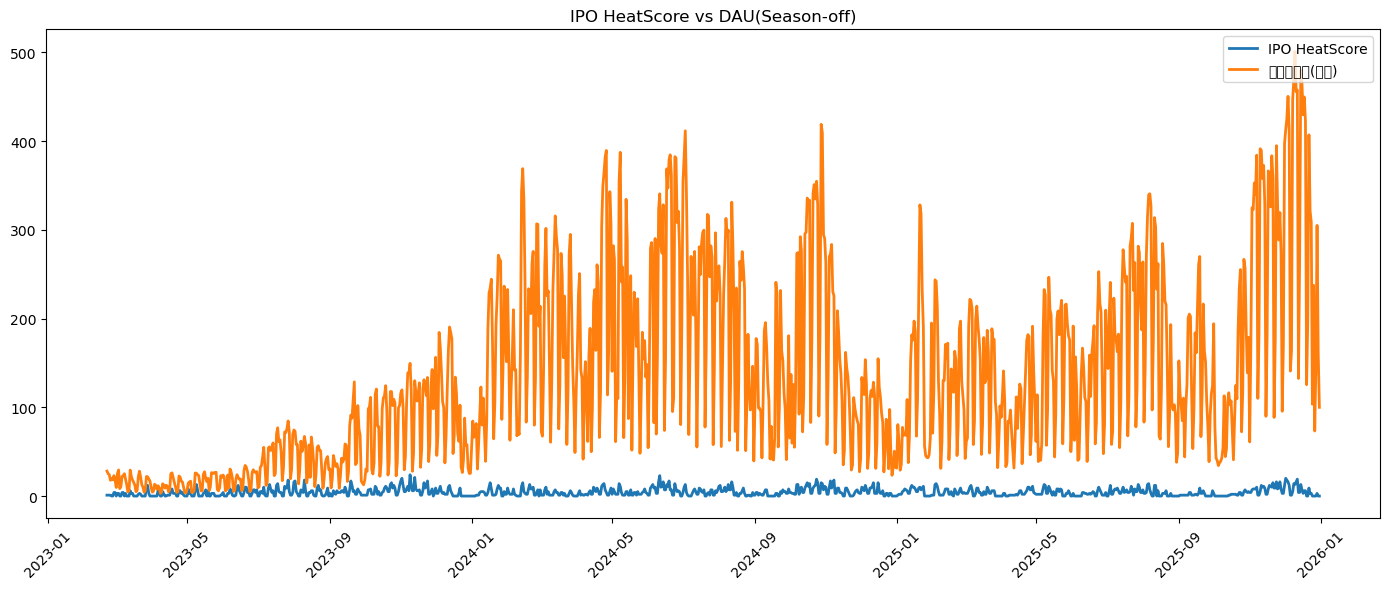

In [17]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14,6))

# 1️⃣ HeatScore 라인
plt.plot(
    merged["날짜"],
    merged["HeatScore"],
    label="IPO HeatScore",
    linewidth=2
)

# 2️⃣ 접속자현황 라인
plt.plot(
    merged["날짜"],
    merged["접속자현황"],
    label="접속자현황(지수)",
    linewidth=2
)

# 3️⃣ 비수기 영역 음영 처리
for i in range(len(merged)):
    if merged.loc[i, "시즌구분"] == "비수기":
        plt.axvspan(
            merged.loc[i, "날짜"],
            merged.loc[i, "날짜"],
            alpha=0.1
        )

plt.legend()
plt.title("IPO HeatScore vs DAU(Season-off)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5693/2313528881.py:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight

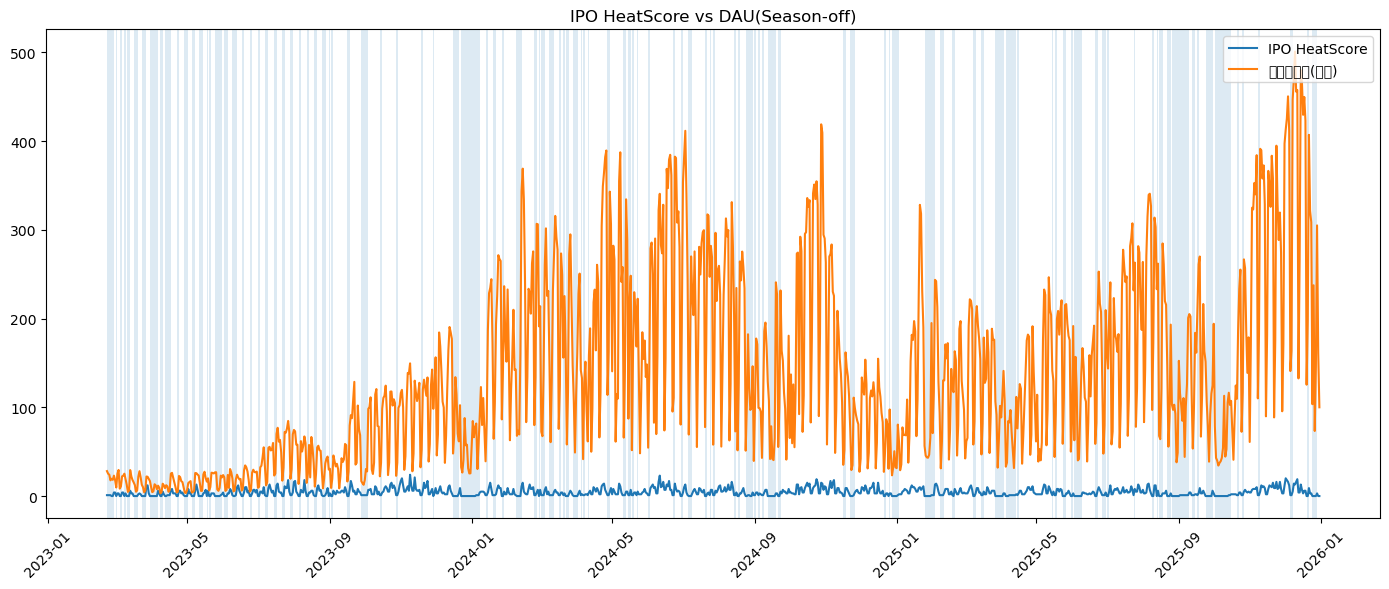

In [13]:
plt.figure(figsize=(14,6))

plt.plot(merged["날짜"], merged["HeatScore"], label="IPO HeatScore")
plt.plot(merged["날짜"], merged["접속자현황"], label="접속자현황(지수)")

# 비수기 구간 찾기
is_off = merged["시즌구분"]=="비수기"
start = None

for i in range(len(merged)):
    if is_off.iloc[i] and start is None:
        start = merged["날짜"].iloc[i]
    elif not is_off.iloc[i] and start is not None:
        plt.axvspan(start, merged["날짜"].iloc[i], alpha=0.15)
        start = None

plt.legend()
plt.title("IPO HeatScore vs DAU(Season-off)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
merged.groupby("시즌구분")["접속자현황"].describe()

,count,mean,std,min,25%,50%,75%,max
시즌구분,,,,,,,,
비수기,353.0,71.988106,57.789858,3.066770,25.271739,58.035714,106.754658,269.992236
성수기,692.0,164.869583,110.723317,8.734472,68.866460,142.255435,243.779115,500.776398


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from

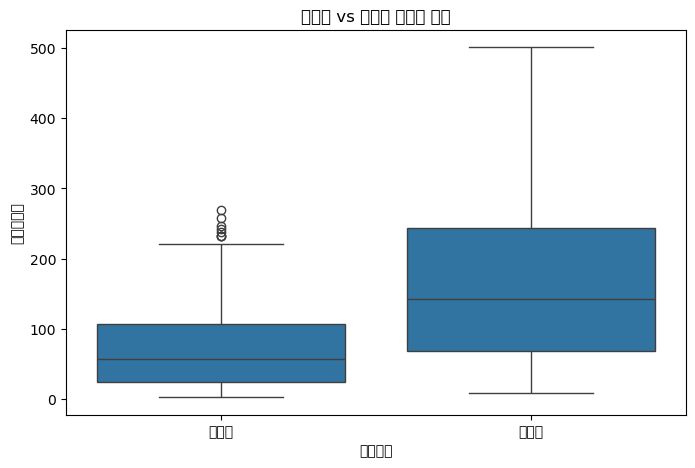

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(8,5))

sns.boxplot(
    data=merged,
    x="시즌구분",
    y="접속자현황"
)

plt.title("성수기 vs 비수기 방문자 분포")
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51596 (\N{HANGUL SYLLABLE JEUN}) missing from font(s) DejaVu Sans.
  fig.

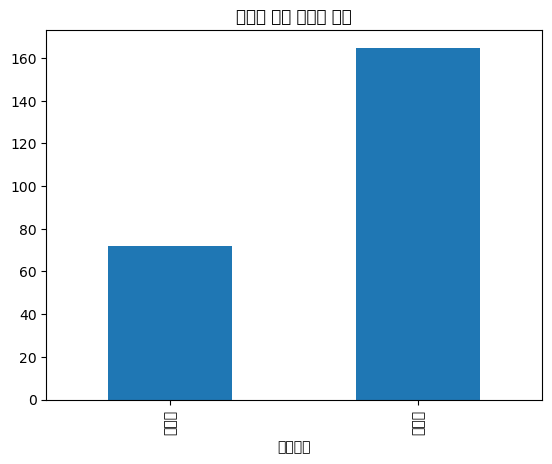

In [16]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

merged.groupby("시즌구분")["접속자현황"].mean().plot(
    kind="bar",
    title="시즌별 평균 방문자 비교"
)
plt.show()